In [33]:
import numpy as np
import scipy.io
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
from scipy.signal import butter, lfilter
from scipy.signal import butter, sosfilt, sosfreqz
from scipy.signal import welch
from scipy import signal
import os

In [34]:
import matplotlib.pyplot as plt

In [35]:
sample_rate = 128

In [36]:
def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    sos = butter(order, [low, high], analog=False, btype='band', output='sos')
    return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=6):
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    y = sosfilt(sos, data)
    return y

def butter_lowpass(cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=6):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [41]:
for user_id in range(1, 2):
    print('User ID: ' + str(user_id))
    
    mean_skin_resistance = []
    mean_first_derivative_res = []
    mean_abs_first_derivative_res = []
    mean_neg_first_derivative_res = []
    percentage_neg_first_derivative_res = []
    std_skin_resistance = []
    avg_minima_con = []
    #avg_rising_time_res =[]
    #log_power_density = []
    std_skin_conductance = []
    mean_first_derivative_con = []
    mean_abs_first_derivative_con = []
    mean_abs_second_derivative_con = []
    avg_minima_res = []
    #log_power_density
    psd_subband_01 = []
    psd_subband_02 = []
    psd_subband_03 = []
    psd_subband_04 = []
    zero_crossing_con_slow = []
    zero_crossing_con_very_slow = []
    psd_subband_11 = []
    psd_subband_12 = []
    psd_subband_13 = []
    psd_subband_14 = []
    psd_subband_15 = []
    psd_subband_16 = []
    psd_subband_17 = []
    psd_subband_18 = []
    psd_subband_19 = []
    psd_subband_10 = []
    
    
    for clip_id in range(1, 2):
        #print('Clip ID: ' + str(clip_id))
        
        data_path = './../ASCERTAIN_Raw/GSRData/Movie_P' + str(user_id).zfill(2) + '/GSR_Clip' + str(clip_id) + '.mat'
        
        if os.path.isfile(data_path):
            
            signal = scipy.io.loadmat(data_path)
            resistance = signal['Data_GSR'][:,4]
            time_stamp = signal['Data_GSR'][:,0]
            #print(signal)
            
            x = signal['Data_GSR'][:,0]
            y = resistance
            #plt.plot(x,y)
            #plt.show()
            yhat = savgol_filter(y, 501, 3)
            #plt.plot(x, yhat)
            #plt.show()
            
            resistance = yhat
            conductance = 1 / yhat
            #print(np.mean(resistance))
            
            # mean skin resistance
            mean_skin_resistance.append(np.mean(resistance))
            #print(mean_skin_resistance)
            
            # mean of first derivative of skin resistance
            first_derivatives = np.diff(resistance) / np.diff(time_stamp)
            mean_first_derivative_res.append(np.mean(first_derivatives))
            # print(mean_first_derivative_res)
            
            # mean of the absolute values of the first derivatives of skin resistance
            mean_abs_first_derivative_res.append(np.mean(np.absolute(first_derivatives)))
            #print(mean_abs_first_derivative_res)
            
            # mean of the negative first derivates of skin resistance
            #print(len(first_derivatives[first_derivatives < 0]))
            #print(len(first_derivatives))
            mean_neg_first_derivative_res.append(np.mean(first_derivatives[first_derivatives < 0]))
            #print(mean_neg_first_derivative_res)
            
            # percentage of negative first derivative
            #((first_derivatives[first_derivatives < 0]).sum() / len(first_derivatives))
            percentage_neg_first_derivative_res.append(((first_derivatives[first_derivatives < 0]).sum() / len(first_derivatives)))
            
            # standard deviation of skin resistance
            std_skin_resistance.append(np.std(resistance))
            #print(std_skin_resistance)
            
            # average number of local minima in skin conductance
            peaks, _ = find_peaks(resistance)
            avg_minima_con.append(len(peaks) / len(resistance))
            #plt.plot(resistance)
            #plt.scatter(peaks, resistance[peaks], marker='x', color='red')
            #plt.show()
            #print(avg_minima_con)
            
            # log power density of 4 subbands
            #subband_1 = butter_lowpass_filter(resistance, 0.1, sample_rate, order=6)
            #subband_2 = butter_bandpass_filter(resistance, 0.1, 0.2, sample_rate, order=6)
            #subband_3 = butter_bandpass_filter(resistance, 0.2, 0.3, sample_rate, order=6)
            #subband_4 = butter_bandpass_filter(resistance, 0.3, 0.4, sample_rate, order=6)
            epsilon = np.finfo(float).eps
            f, P = welch(resistance, sample_rate, nperseg = sample_rate * 15, noverlap = sample_rate * 10)
            #print(np.sum(P(f > 0 and f <= 0.1)))
            psd_subband_01.append(np.log(np.sum(P[(f > 0) & (f <= 0.1)]) + epsilon))
            psd_subband_02.append(np.log(np.sum(P[(f > 0.1) & (f <= 0.2)]) + epsilon))
            psd_subband_03.append(np.log(np.sum(P[(f > 0.2) & (f <= 0.3)]) + epsilon))
            psd_subband_04.append(np.log(np.sum(P[(f > 0.3) & (f <= 0.4)]) + epsilon))     
            #print(np.log(np.sum(P(f > 0.3 and f <= 0.4))))
            
            #plt.plot(time_stamp, subband_2)
            #plt.plot(time_stamp, subband_3, color='red')
            #plt.plot(time_stamp, subband_4, color='green')
            #plt.plot(time_stamp, subband_1, color='yellow')
            
            # standard deviation of skin conductance
            std_skin_conductance.append(np.std(conductance))
            #print(std_skin_conductance)
            
            # mean of first derivative of skin conductance
            first_derivatives = np.diff(conductance) / np.diff(time_stamp)
            mean_first_derivative_con.append(np.mean(first_derivatives))
            #print(mean_first_derivative_con)
            
            # mean of the absolute values of the first derivatives of skin conductance
            mean_abs_first_derivative_con.append(np.mean(np.absolute(first_derivatives)))
            
            # mean of the absolute values of the second derivative of skin conductance
            second_derivatives = np.diff(first_derivatives) / np.diff(time_stamp)[:-1]
            mean_abs_second_derivative_con.append(np.mean(np.absolute(second_derivatives)))
            #print(np.diff(time_stamp))
            
            # average number of local minima in skin resistance
            peaks, _ = find_peaks(conductance)
            avg_minima_con.append(len(peaks) / len(conductance))
            #print(conductance[peaks])
            #print(_)
            
            # log power density of 10 subbands
            psd_subband_11.append(np.log(np.sum(P[(f > 0.0) & (f <= 0.24)]) + epsilon))
            psd_subband_12.append(np.log(np.sum(P[(f > 0.24) & (f <= 0.48)]) + epsilon))
            psd_subband_13.append(np.log(np.sum(P[(f > 0.48) & (f <= 0.72)]) + epsilon))
            psd_subband_14.append(np.log(np.sum(P[(f > 0.72) & (f <= 0.96)]) + epsilon))
            psd_subband_15.append(np.log(np.sum(P[(f > 0.96) & (f <= 1.2)]) + epsilon))
            psd_subband_16.append(np.log(np.sum(P[(f > 1.2) & (f <= 1.44)]) + epsilon))
            psd_subband_17.append(np.log(np.sum(P[(f > 1.44) & (f <= 1.68)]) + epsilon))
            psd_subband_18.append(np.log(np.sum(P[(f > 1.68) & (f <= 1.92)]) + epsilon))
            psd_subband_19.append(np.log(np.sum(P[(f > 1.92) & (f <= 2.16)]) + epsilon))
            psd_subband_10.append(np.log(np.sum(P[(f > 2.16) & (f <= 2.4)]) + epsilon))
            
            # zero crossing rate of skin conductance slow response
            #slow_res = butter_lowpass(conductance, 0.2, sample_rate)
            #zero_crossing_con_slow.append(((slow_res[:-1] * slow_res[1:]) < 0).sum())
            
            # zero crossing rate of skin conductance very slow response
            #very_slow_res = butter_lowpass(conductance, 0.08, sample_rate)
            #zero_crossing_con_very_slow.append(((very_slow_res[:-1] * very_slow_res[1:]) < 0).sum())

User ID: 1
[2.77956534e-05 2.77903708e-05 2.77903429e-05 2.77903451e-05
 2.77903750e-05 2.78679990e-05 2.78684212e-05 2.78684123e-05
 2.78684195e-05 2.78684366e-05 2.78684549e-05 2.78684556e-05
 2.78684531e-05 2.78684400e-05 2.78645123e-05 2.78645024e-05
 2.78645108e-05 2.78645105e-05 2.78645224e-05 2.79670175e-05
 2.79678942e-05 2.79925165e-05 2.79926014e-05 2.79926287e-05
 2.79926375e-05 2.79926610e-05 2.79926772e-05 2.79927075e-05
 2.79928505e-05 2.79928861e-05 2.79928840e-05 2.79929344e-05
 2.79930370e-05 2.79931981e-05 2.79932207e-05 2.79932595e-05
 2.79932737e-05 2.79932777e-05 2.79932844e-05 2.79932966e-05
 2.79933170e-05 2.79933473e-05 2.79934003e-05 2.79934443e-05
 2.79934725e-05 2.79936260e-05 2.79937304e-05 2.79943045e-05
 2.79968017e-05 2.79968351e-05 2.80496826e-05 2.80497602e-05
 2.80498660e-05 2.80499198e-05 2.80499527e-05 2.80499679e-05
 2.80499655e-05 2.80499689e-05 2.80499862e-05 2.80500038e-05
 2.80500000e-05 2.80499997e-05 2.80499958e-05 2.80499967e-05
 2.80499888e-

In [29]:
l = []
for i in range(11):
    l.append(i * 0.24)
l

[0.0, 0.24, 0.48, 0.72, 0.96, 1.2, 1.44, 1.68, 1.92, 2.16, 2.4]

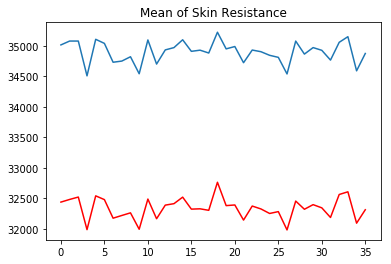

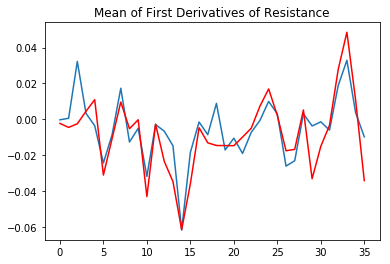

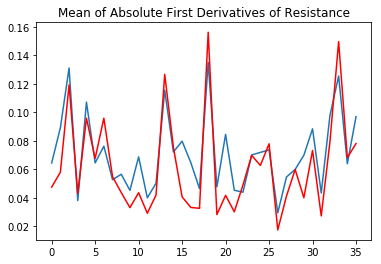

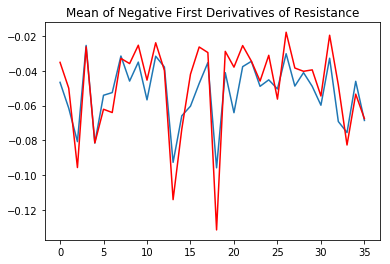

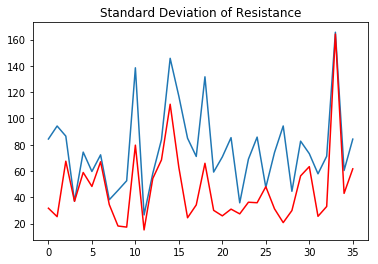

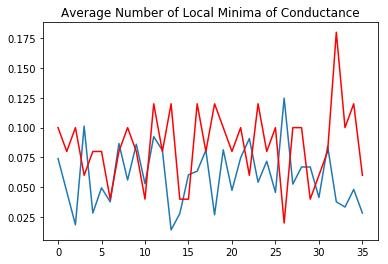

In [10]:
user_id = 2

# features list
mean_skin_resistance = []
mean_first_derivative_res = []
mean_abs_first_derivative_res = []
mean_neg_first_derivative_res = []
#percentage_neg_first_derivative_res = []
std_skin_resistance = []
avg_minima_con = []
#avg_rising_time_res =[]
#log_power_density = []
std_skin_conductance = []
mean_first_derivative_con = []
mean_abs_first_derivative_con = []
mean_abs_second_derivative_con = []
avg_minima_res = []
#log_power_density

time_stamp

for clip_id in range(1, 37):
    # load the raw data
    data_path = './../ASCERTAIN_Raw/GSRData/Movie_P' + str(user_id).zfill(2) + '/GSR_Clip' + str(clip_id) + '.mat'
    signal = scipy.io.loadmat(data_path)
    resistance = signal['Data_GSR'][:,4]
    time_stamp = signal['Data_GSR'][:,0]

    # smoothing the curve
    #plt.plot(time_stamp, resistance)
    #plt.title('Signal before smoothing')
    #plt.show()
    
    resistance = savgol_filter(resistance, 101, 3)
    conductance = 1 / resistance
    
    #plt.plot(time_stamp, resistance)
    #plt.title('Signal after smoothing')
    #plt.show()

    # calculating the features
    mean_skin_resistance.append(np.mean(resistance))
    first_derivatives = np.diff(resistance) / np.diff(time_stamp)
    mean_first_derivative_res.append(np.mean(first_derivatives))
    mean_abs_first_derivative_res.append(np.mean(np.absolute(first_derivatives)))
    mean_neg_first_derivative_res.append(np.mean(first_derivatives[first_derivatives < 0]))
    std_skin_resistance.append(np.std(resistance))
    peaks, _ = find_peaks(resistance)
    avg_minima_con.append(len(peaks) / len(resistance))
    std_skin_conductance.append(np.std(conductance))
    first_derivatives = np.diff(conductance) / np.diff(time_stamp)
    mean_first_derivative_con.append(np.mean(first_derivatives))
    mean_abs_first_derivative_con.append(np.mean(np.absolute(first_derivatives)))
    second_derivatives = np.diff(first_derivatives) / np.diff(time_stamp)[:-1]
    mean_abs_second_derivative_con.append(np.mean(np.absolute(second_derivatives)))
    peaks, _ = find_peaks(conductance)
    #print(len(peaks) / len(conductance))
    #print(len(conductance))
    avg_minima_res.append(len(peaks) / len(conductance))
    #print(len(avg_minima_con))

# load the ASCERTAIN features for User ID and Clip ID
data_path = './../ASCERTAIN_Features/ASCERTAIN_Features/Dt_GSRFeatures.mat'
signal = scipy.io.loadmat(data_path)
#print(signal['GSRFeatures_58'][0,0][:,0])

plt.plot(np.array(mean_skin_resistance))
plt.plot(signal['GSRFeatures_58'][0, user_id - 1][:,0], color='red')
plt.title('Mean of Skin Resistance')
plt.show()
plt.plot(7*np.array(mean_first_derivative_res))
plt.plot(signal['GSRFeatures_58'][0, user_id - 1][:,1], color='red')
plt.title('Mean of First Derivatives of Resistance')
plt.show()
plt.plot(5*np.array(mean_abs_first_derivative_res))
plt.plot(signal['GSRFeatures_58'][0, user_id - 1][:,2], color='red')
plt.title('Mean of Absolute First Derivatives of Resistance')
plt.show()
plt.plot(5*np.array(mean_neg_first_derivative_res))
plt.plot(signal['GSRFeatures_58'][0, user_id - 1][:,3], color='red')
plt.title('Mean of Negative First Derivatives of Resistance')
plt.show()
plt.plot(np.array(std_skin_resistance))
plt.plot(signal['GSRFeatures_58'][0, user_id - 1][:,5], color='red')
plt.title('Standard Deviation of Resistance')
plt.show()
plt.plot(np.array(avg_minima_con))
plt.plot(signal['GSRFeatures_58'][0, user_id - 1][:,6], color='red')
plt.title('Average Number of Local Minima of Conductance')
plt.show()

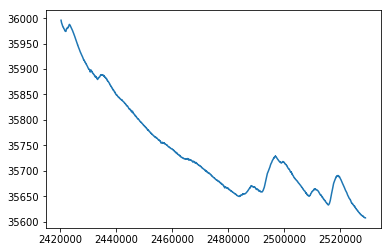

In [7]:
yhat = savgol_filter(y, 51, 3)
plt.plot(x, yhat)
plt.show()